In [ ]:
import pandas as pd 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [ ]:
bostosH = datasets.load_boston()

In [ ]:
df = pd.DataFrame(bostosH.data, columns=bostosH.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df['medv'] = bostosH.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
print(bostosH.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X = df.drop(['medv'], axis=1)
y = bostosH.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
L_model = linear_model.LinearRegression()

In [ ]:
L_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = L_model.predict(x_test)

In [ ]:
print('Intercept: ', L_model.intercept_)
print('Coefficients: ', L_model.coef_)
print('Mean Squared error(MSE): %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

Intercept:  34.62981308184044
Coefficients:  [-1.21925880e-01  5.41207427e-02 -4.38636633e-03  2.81082521e+00
 -1.67971922e+01  3.71170951e+00 -1.45655379e-03 -1.45236967e+00
  3.31351765e-01 -1.03400075e-02 -9.47782334e-01  1.25317401e-02
 -5.19602860e-01]
Mean Squared error(MSE): 23.39
Coefficient of determination (R^2): 0.70


In [ ]:
#formula de regresion lineal
# y  = b0 + b1*x + e
#b0 = intercepcion
#b1 = coeficientes
#e = error

In [ ]:
df_coef = pd.DataFrame(L_model.coef_.reshape(-1,13), columns=bostosH.feature_names)
df_coef

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.121926,0.054121,-0.004386,2.810825,-16.797192,3.71171,-0.001457,-1.45237,0.331352,-0.01034,-0.947782,0.012532,-0.519603


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


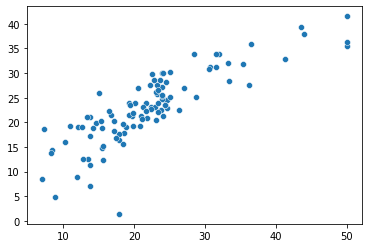

In [ ]:
sns.scatterplot(y_test, y_pred)